In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#check if gpu is available or not
import tensorflow as tf
if tf.test.gpu_device_name():
    print('default gpu device {}'.format(tf.test.gpu_device_name()))
else:
    print('plesase install gpu')

plesase install gpu


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [4]:
tf.test.gpu_device_name()

''

In [5]:
#keras imports
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing

#matplotlib
import matplotlib.pyplot as plt

#Some more imports
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split


In [6]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# y variable just checking
train['label']

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
# checking the test dataset
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# as the label variable of the test dataset needs to mark as the y_train
y_train = train['label']
X_train = train.drop(['label'], axis=1)

In [10]:
# get the shape of our test and train data
y_train.shape, X_train.shape

((42000,), (42000, 784))

In [11]:
# Optimizing the data
X_train = X_train/255
test = test/255


In [12]:
# Reshaping the data into a numpy array of images
X_train = X_train.values.reshape(-1, 28,28,1)
test = test.values.reshape(-1,28,28,1)

In [13]:
# changing our target variable into categorical variable
y_train = to_categorical(y_train, num_classes = 10)

In [14]:
# checking the individual data in the dataset
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

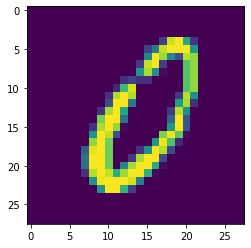

In [15]:
#in the data set the image values are converted into a csv and afer some data preprocessing, checking the real image of random arrays
plt.imshow(X_train[896])

In [16]:
# making the validation dataset as our model requires to validate while trainings

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_train.shape, X_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

In [17]:
# CNN Model from scratch

model_s = Sequential([
    

    #Defining the input layer
    layers.InputLayer(input_shape = [28, 28, 1]),
    preprocessing.RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu"),
    layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Dropout(rate = 0.3),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"),
    layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Dropout(rate = 0.3),
        
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(rate = 0.25),
    layers.Dense(10, activation = 'softmax')
])
    
    



In [18]:
#making the compile attributes
model_s.compile(
            optimizer = "adam",
            loss = "categorical_crossentropy",
            metrics = ["accuracy"])
    

In [19]:
# Check the model summary
model_s.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_translation (RandomTr (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [20]:
# fit the model
history = model_s.fit(X_train, y_train, batch_size = 32, epochs = 60, validation_data = (X_val, y_val))

Epoch 1/60
1050/1050 [==============================] - 148s 140ms/step - loss: 0.5883 - accuracy: 0.7985 - val_loss: 0.0570 - val_accuracy: 0.9824
Epoch 2/60
1050/1050 [==============================] - 146s 139ms/step - loss: 0.1053 - accuracy: 0.9679 - val_loss: 0.0568 - val_accuracy: 0.9829
Epoch 3/60
1050/1050 [==============================] - 147s 140ms/step - loss: 0.0797 - accuracy: 0.9752 - val_loss: 0.0321 - val_accuracy: 0.9896
Epoch 4/60
1050/1050 [==============================] - 146s 139ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 5/60
1050/1050 [==============================] - 146s 139ms/step - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 6/60
1050/1050 [==============================] - 146s 139ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0360 - val_accuracy: 0.9880
Epoch 7/60
1050/1050 [==============================] - 146s 139ms/step - loss: 0.0546 - accuracy: 0.9829 - val_

1050/1050 [==============================] - 147s 140ms/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.0219 - val_accuracy: 0.9942
Epoch 57/60
1050/1050 [==============================] - 148s 141ms/step - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.0245 - val_accuracy: 0.9933
Epoch 58/60
1050/1050 [==============================] - 146s 139ms/step - loss: 0.0318 - accuracy: 0.9908 - val_loss: 0.0186 - val_accuracy: 0.9954
Epoch 59/60
1050/1050 [==============================] - 147s 140ms/step - loss: 0.0244 - accuracy: 0.9934 - val_loss: 0.0251 - val_accuracy: 0.9937
Epoch 60/60
1050/1050 [==============================] - 148s 141ms/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 0.0213 - val_accuracy: 0.9950


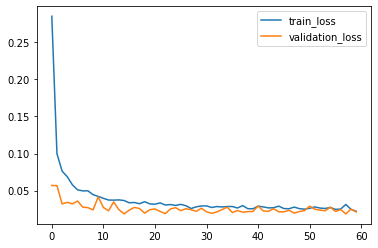

<Figure size 432x288 with 0 Axes>

In [21]:
# check the validation score of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

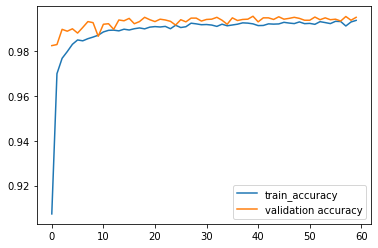

<Figure size 432x288 with 0 Axes>

In [23]:
# check the accurcy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy_val_accuracy')

In [24]:
#predicting the data
preds = model_s.predict(test)

In [25]:
# using argmax get the values into 0-9
results = np.argmax(preds, axis=1)
# creating a series with label columns
results = pd.Series(results, name='label')
# creating a df of output
sub = pd.concat([pd.Series(range(1,28001), name= 'image_id'), results], axis=1)
sub.to_csv('submission_1.csv', index=False)
sub.head()

,image_id,label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
